# Identification Analysis of 401(k) Example w DAGs

Using Dagitty in the Analysis of Impact of 401(k) on Net Financial Wealth

In [1]:
#install and load packages
import graphviz as gv
from matplotlib import style
style.use("fivethirtyeight")
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt
import networkx as nx
from optimaladj.CausalGraph import CausalGraph

Graphs for 401(K) Analsyis

 Here we have
  * $Y$ -- net financial assets;
  * $X$ -- worker characteristics (income, family size, other retirement plans; see lecture notes for details);
  * $F$ -- latent (unobserved) firm characteristics
  * $D$ -- 401(K) eligibility, deterimined by $F$ and $X$

## State one graph (where F determines X) and plot it

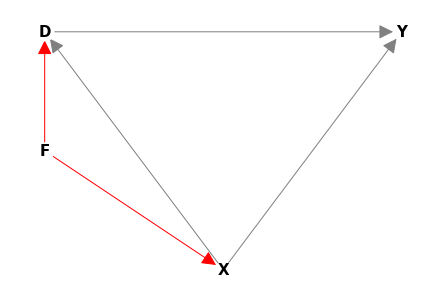

In [2]:
G1 = CausalGraph()
    
G1.add_node('Y', latent=False, pos=(4,0))
G1.add_node('D', latent=False, pos=(0,0))
G1.add_node('X', latent=False, pos=(2,-2))
G1.add_node("F", latent=True, pos=(0,-1))
pos=nx.get_node_attributes(G1,'pos')

G1.add_edge("D", "Y")
G1.add_edge("X", "D")
G1.add_edge("F", "X")
G1.add_edge("F", "D")
G1.add_edge("X", "Y")

nx.draw(G1, pos, with_labels = True, style = 'solid',
        edge_color=['red' if G1.nodes[e[0]]['latent'] else 'gray' for e in G1.edges],
        font_weight='bold', font_size=15, font_color='black',
        node_color='white', arrowsize=30)

List minimal adjustment sets to identify causal effecs $D \to Y$


In [3]:
G1.optimal_minimal_adj_set("D", "Y", [], ["X"])

{'X'}

What is the underlying principle? 

Here condition on X blocks backdoor paths from Y to D (Pearl).  Dagitty correctly finds X (and does many more correct decisions, when we consider more elaborate structures. Why do we want to consider more elaborate structures? The very empirical problem requires us to do so!

## Another Graph (wherere $X$ determine $F$):

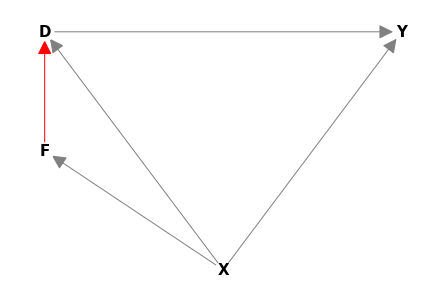

In [4]:
G2 = CausalGraph()
    
G2.add_node('Y', latent=False, pos=(4,0))
G2.add_node('D', latent=False, pos=(0,0))
G2.add_node('X', latent=False, pos=(2,-2))
G2.add_node("F", latent=True, pos=(0,-1))
pos=nx.get_node_attributes(G2,'pos')

G2.add_edge("D", "Y")
G2.add_edge("X", "D")
G2.add_edge("X", "F")
G2.add_edge("F", "D")
G2.add_edge("X", "Y")

nx.draw(G2, pos, with_labels = True, style = 'solid',
        edge_color=['red' if G2.nodes[e[0]]['latent'] else 'gray' for e in G2.edges],
        font_weight='bold', font_size=15, font_color='black',
        node_color='white', arrowsize=30)

In [5]:
G2.optimal_minimal_adj_set("D", "Y", [], ["X"])

{'X'}

## One more graph (encompassing previous ones), where (F, X) are jointly determined by latent factors $A$. We can allow in fact the whole triple (D, F, X) to be jointly determined by latent factors $A$.

This is much more realistic graph to consider.

{'X'}


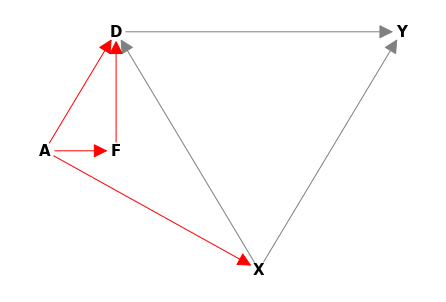

In [6]:
G3 = CausalGraph()
  
G3.add_node('Y', latent=False, pos=(4,0))
G3.add_node('D', latent=False, pos=(0,0))
G3.add_node('X', latent=False, pos=(2,-2))
G3.add_node("F", latent=True, pos=(0,-1))
G3.add_node("A", latent=True, pos=(-1,-1))

pos=nx.get_node_attributes(G3,'pos')

G3.add_edge("D", "Y")
G3.add_edge("X", "D")
G3.add_edge("F", "D")
G3.add_edge("A", "F")
G3.add_edge("A", "X")
G3.add_edge("A", "D")
G3.add_edge("X", "Y")

print(G3.optimal_minimal_adj_set("D", "Y", [], ["X"]))

nx.draw(G3, pos, with_labels = True, style = 'solid',
        edge_color=['red' if G3.nodes[e[0]]['latent'] else 'gray' for e in G3.edges],
        font_weight='bold', font_size=15, font_color='black',
        node_color='white', arrowsize=30)

## Threat to Idenitification: What if $F$ also directly affects $Y$? (Note that there are no valid adjustment sets in this case)

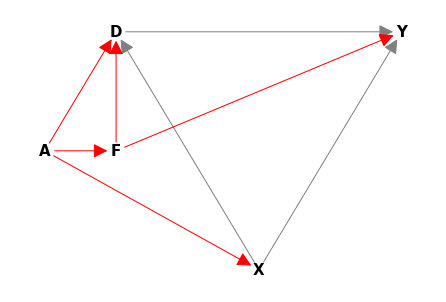

In [7]:
G4 = CausalGraph()
  
G4.add_node('Y', latent=False, pos=(4,0))
G4.add_node('D', latent=False, pos=(0,0))
G4.add_node('X', latent=False, pos=(2,-2))
G4.add_node("F", latent=True, pos=(0,-1))
G4.add_node("A", latent=True, pos=(-1,-1))

pos=nx.get_node_attributes(G4,'pos')

G4.add_edge("D", "Y")
G4.add_edge("X", "D")
G4.add_edge("F", "D")
G4.add_edge("A", "F")
G4.add_edge("A", "X")
G4.add_edge("A", "D")
G4.add_edge("F", "Y")
G4.add_edge("X", "Y")

nx.draw(G4, pos, with_labels = True, style = 'solid',
        edge_color=['red' if G4.nodes[e[0]]['latent'] else 'gray' for e in G4.edges],
        font_weight='bold', font_size=15, font_color='black',
        node_color='white', arrowsize=30)

In [8]:
G4.optimal_minimal_adj_set("D", "Y", [], ["X"])

NoAdjException: An adjustment set formed by observable variables does not exist

This last code show us an error because  there is no valid adustment set (among observed variables)

How can F affect Y directly? Is it reasonable?
## Introduce Match Amount $M$ (very important mediator, why mediator?). $M$ is not observed.  Luckily adjusting for $X$ still works if there is no $F \to M$ arrow.

{'X'}


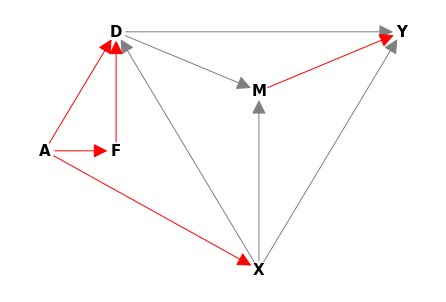

In [36]:
G5 = CausalGraph()
  
G5.add_node('Y', latent=False, pos=(4,0))
G5.add_node('D', latent=False, pos=(0,0))
G5.add_node('X', latent=False, pos=(2,-2))
G5.add_node("F", latent=True, pos=(0,-1))
G5.add_node("A", latent=True, pos=(-1,-1))
G5.add_node("M", latent=True, pos=(2,-.5))


pos=nx.get_node_attributes(G5,'pos')

G5.add_edge("D", "Y")
G5.add_edge("X", "D")
G5.add_edge("F", "D")
G5.add_edge("A", "F")
G5.add_edge("A", "X")
G5.add_edge("A", "D")
G5.add_edge("D", "M")
G5.add_edge("M", "Y")
G5.add_edge("X", "M")
G5.add_edge("X", "Y")

print(G5.optimal_minimal_adj_set("D", "Y", [], ["X"]))

nx.draw(G5, pos, with_labels = True, style = 'solid',
        edge_color=['red' if G5.nodes[e[0]]['latent'] else 'gray' for e in G5.edges],
        font_weight='bold', font_size=15, font_color='black',
        node_color='white', arrowsize=30)

## If  there is $F \to M$ arrow, then adjusting for $X$ is not sufficient.

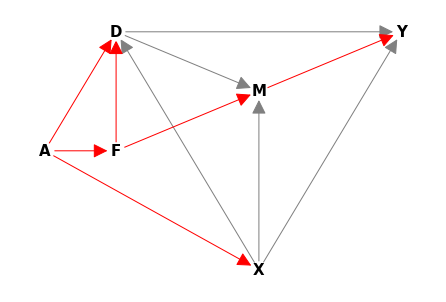

In [38]:
G6 = CausalGraph()
  
G6.add_node('Y', latent=False, pos=(4,0))
G6.add_node('D', latent=False, pos=(0,0))
G6.add_node('X', latent=False, pos=(2,-2))
G6.add_node("F", latent=True, pos=(0,-1))
G6.add_node("A", latent=True, pos=(-1,-1))
G6.add_node("M", latent=True, pos=(2,-.5))


pos=nx.get_node_attributes(G6,'pos')

G6.add_edge("D", "Y")
G6.add_edge("X", "D")
G6.add_edge("F", "D")
G6.add_edge("A", "F")
G6.add_edge("A", "X")
G6.add_edge("D", "M")
G6.add_edge("F", "M")
G6.add_edge("A", "D")
G6.add_edge("M", "Y")
G6.add_edge("X", "M")
G6.add_edge("X", "Y")

nx.draw(G6, pos, with_labels = True, style = 'solid',
        edge_color=['red' if G6.nodes[e[0]]['latent'] else 'gray' for e in G6.edges],
        font_weight='bold', font_size=15, font_color='black',
        node_color='white', arrowsize=30)

In [39]:
G6.optimal_minimal_adj_set("D", "Y", [], ["X"])

NoAdjException: An adjustment set formed by observable variables does not exist

This last code show us an error because  there is no valid adustment set (among observed variables)